In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv


%matplotlib inline

In [34]:
load_dotenv()
mapbox_token = os.getenv("mapbox")

# Load Data

In [35]:
file_path = Path("./Desktop/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182946,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


#  Housing Units Per Year

In [36]:
sfo_data_mean_per_year = sfo_data.groupby("year").mean()
sfo_data_mean_per_year.reset_index(inplace=True)
#sfo_data_mean_per_year.drop(['sales_price_sqr_foot', 'gross_rent'])
sfo_data_mean_per_year

,year,sale_price_sqr_foot,housing_units,gross_rent
0,2010,369.344353,372560,1239
1,2011,341.903429,374507,1530
2,2012,399.389968,376454,2324
3,2013,483.600304,378401,2971
4,2014,556.277273,380348,3528
5,2015,632.540352,382295,3739
6,2016,697.643709,384242,4390


<Figure size 432x288 with 0 Axes>

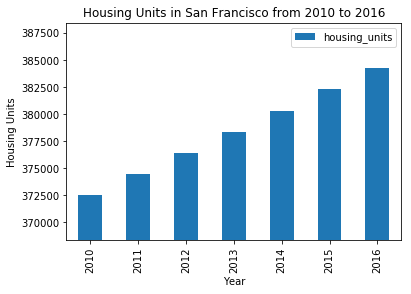

In [37]:
std=sfo_data_mean_per_year["housing_units"].std()

housing_units_per_year_fig = plt.figure()
housing_units_per_year_plot = sfo_data_mean_per_year.plot(title="Housing Units in San Francisco from 2010 to 2016",kind='bar',x='year',y='housing_units')
housing_units_per_year_plot.set_ylabel("Housing Units")
housing_units_per_year_plot.set_xlabel("Year")
housing_units_per_year_plot.set_ylim(mins,maxes)
plt.show()
plt.close(housing_units_per_year_fig)

#  Average Prices per Square Foot

## Average Gross Rent in San Francisco Per Year

In [38]:
sfo_data_mean_per_year

,year,sale_price_sqr_foot,housing_units,gross_rent
0,2010,369.344353,372560,1239
1,2011,341.903429,374507,1530
2,2012,399.389968,376454,2324
3,2013,483.600304,378401,2971
4,2014,556.277273,380348,3528
5,2015,632.540352,382295,3739
6,2016,697.643709,384242,4390


<Figure size 432x288 with 0 Axes>

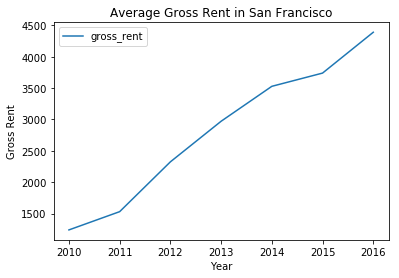

In [39]:
average_gross_rent_per_year_fig = plt.figure()
average_gross_rent_per_year = sfo_data_mean_per_year.plot(title="Average Gross Rent in San Francisco",kind='line',x='year',y='gross_rent')
average_gross_rent_per_year.set_ylabel("Gross Rent")
average_gross_rent_per_year.set_xlabel("Year")
plt.show()
plt.close(average_gross_rent_per_year_fig)

## Average Sales Price per Year

<Figure size 432x288 with 0 Axes>

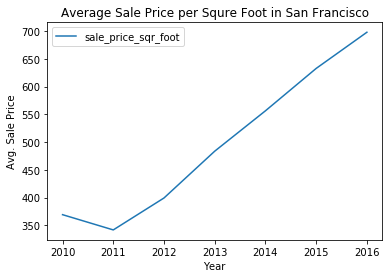

In [40]:
average_sale_price_per_squre_foot_fig = plt.figure()
average_sale_price_per_squre_foot = sfo_data_mean_per_year.plot(title="Average Sale Price per Squre Foot in San Francisco",kind='line',x='year',y='sale_price_sqr_foot')
average_sale_price_per_squre_foot.set_ylabel("Avg. Sale Price")
average_sale_price_per_squre_foot.set_xlabel("Year")
plt.show()
plt.close(average_sale_price_per_squre_foot_fig)

##  Average Prices by Neighborhood

In [41]:
average_prices_by_neighborhood = sfo_data.groupby(["year","neighborhood"]).mean()
average_prices_by_neighborhood.reset_index(inplace=True)
average_prices_by_neighborhood.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182946,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [42]:
average_prices_by_neighborhood.hvplot.line(x='year',y="sale_price_sqr_foot",ylabel='Avg. Sale Price per Square Foot',groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

##  The Top 10 Most Expensive Neighborhoods

In [43]:
mean_neighborhood = sfo_data.groupby("neighborhood").mean()
mean_neighborhood = mean_neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False)
mean_neighborhood_top_10 = mean_neighborhood.head(10)
mean_neighborhood_top_10.reset_index(inplace=True)
mean_neighborhood_top_10

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [44]:
mean_neighborhood_top_10.hvplot.bar(x='neighborhood',y="sale_price_sqr_foot",ylabel='Avg. Sale Price per Square Foot',rot=90,width=800,height=460)

:Bars   [neighborhood]   (sale_price_sqr_foot)

# Parallel Coordinates and Parallel Categories Analysis

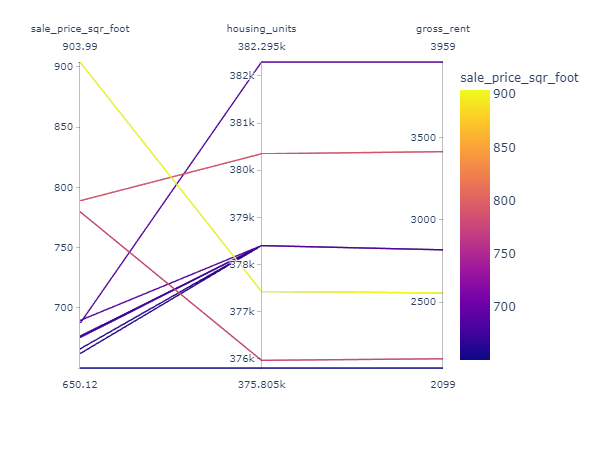

In [52]:
parallel_coordinates = px.parallel_coordinates(mean_neighborhood_top_10, color='sale_price_sqr_foot')
parallel_coordinates

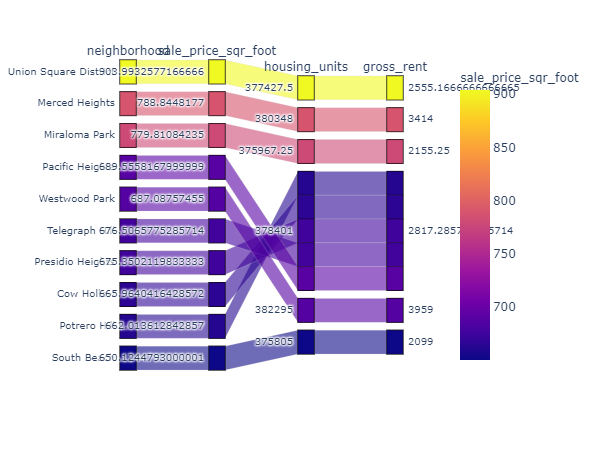

In [53]:
parallel_categories = px.parallel_categories(mean_neighborhood_top_10, color='sale_price_sqr_foot')
parallel_categories

#  Neighborhood Map

## Load Location Data

In [47]:
file_path = Path("./Desktop/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


## Data Preparation

In [48]:
neighborhood = sfo_data.groupby("neighborhood").mean()
neighborhood.reset_index(inplace=True)
neighborhood.head()



,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [49]:
mean_neighborhood_location = pd.concat([df_neighborhood_locations, neighborhood], axis = 'columns', join = 'inner')
mean_neighborhood_location.head()



,Neighborhood,Lat,Lon,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,Bernal Heights,576.746488,379374.5,3080.333333


# Mapbox Visualization

In [57]:
big_map = px.scatter_mapbox(
    mean_neighborhood_location,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco"
)

#big_map = px.scatter_mapbox(mean_neighborhood_location, lat="Lat", lon="Lon", color="gross_rent")

In [80]:
big_map.show()

In [58]:
big_map.show()